# 第四回：文字图例尽眉目

## 一、Figure和Axes上的文本

Matplotlib具有广泛的文本支持，包括对数学表达式的支持、对栅格和矢量输出的TrueType支持、具有任意旋转的换行分隔文本以及Unicode支持。

下面的命令是介绍了通过pyplot API和objected-oriented API分别创建文本的方式。

| [`pyplot`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.html#module-matplotlib.pyplot) API | OO API                                                       | description                                                  |
| :----------------------------------------------------------- | ------------------------------------------------------------ | ------------------------------------------------------------ |
| [`text`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.text.html#matplotlib.pyplot.text) | [`text`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.text.html#matplotlib.axes.Axes.text) | 在 [`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)的任意位置添加text。 |
| [`title`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.title.html#matplotlib.pyplot.title) | [`set_title`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_title.html#matplotlib.axes.Axes.set_title) | 在 [`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)添加title |
| [`figtext`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.figtext.html#matplotlib.pyplot.figtext) | [`text`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.text) | 在[`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)的任意位置添加text. |
| [`suptitle`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.suptitle.html#matplotlib.pyplot.suptitle) | [`suptitle`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.suptitle) | 在 [`Figure`](https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure)添加title |
| [`xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.xlabel.html#matplotlib.pyplot.xlabel) | [`set_xlabel`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_xlabel.html#matplotlib.axes.Axes.set_xlabel) | 在[`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)的x-axis添加label |
| [`ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.ylabel.html#matplotlib.pyplot.ylabel) | [`set_ylabel`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.set_ylabel.html#matplotlib.axes.Axes.set_ylabel) | 在[`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)的y-axis添加label |
| [`annotate`](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.annotate.html#matplotlib.pyplot.annotate) | [`annotate`](https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate) | 向[`Axes`](https://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes)的任意位置添加带有可选箭头的标注. |

### 1.text
pyplot API：matplotlib.pyplot.text(x, y, s, fontdict=None, \*\*kwargs)  
OO API:Axes.text(self, x, y, s, fontdict=None, \*\*kwargs)  
**参数**：此方法接受以下描述的参数：  
s:此参数是要添加的文本。  
xy:此参数是放置文本的点(x，y)。  
fontdict:此参数是一个可选参数，并且是一个覆盖默认文本属性的字典。如果fontdict为None，则由rcParams确定默认值。  
**返回值**：此方法返回作为创建的文本实例的文本。

fontdict主要参数具体介绍，更多参数请参考[官网说明](https://matplotlib.org/api/text_api.html?highlight=text#matplotlib.text.Text)：


| Property                                                     | Description                                                  |
| ------------------------------------------------------------ | :----------------------------------------------------------- |
| [`alpha`](https://matplotlib.org/api/_as_gen/matplotlib.artist.Artist.set_alpha.html#matplotlib.artist.Artist.set_alpha) |float or None   该参数指透明度，越接近0越透明，越接近1越不透明   |                           
| [`backgroundcolor`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_backgroundcolor) | color  [该参数指文本的背景颜色，具体matplotlib支持颜色如下](https://www.cnblogs.com/charliedaifu/p/9957822.html)                                                    |
| [`bbox`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_bbox) | dict with properties for [`patches.FancyBboxPatch`](https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyBboxPatch.html#matplotlib.patches.FancyBboxPatch) 这个是用来设置text周围的box外框 |
| [`color`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_color) or c | color 指的是字体的颜色                                                       |
| [`fontfamily`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontfamily) or family | {FONTNAME, 'serif', 'sans-serif', 'cursive', 'fantasy', 'monospace'} 该参数指的是字体的类型|
| [`fontproperties`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontproperties) or font or font_properties | [`font_manager.FontProperties`](https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties) or [`str`](https://docs.python.org/3/library/stdtypes.html#str) or [`pathlib.Path`](https://docs.python.org/3/library/pathlib.html#pathlib.Path) |
| [`fontsize`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontsize) or size | float or {'xx-small', 'x-small', 'small', 'medium', 'large', 'x-large', 'xx-large'} 该参数指字体大小|
| [`fontstretch`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontstretch) or stretch | {a numeric value in range 0-1000, 'ultra-condensed', 'extra-condensed', 'condensed', 'semi-condensed', 'normal', 'semi-expanded', 'expanded', 'extra-expanded', 'ultra-expanded'} 该参数是指从字体中选择正常、压缩或扩展的字体 |
| [`fontstyle`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontstyle) or style | {'normal', 'italic', 'oblique'} 该参数是指字体的样式是否倾斜等                               |
| [`fontweight`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_fontweight) or weight | {a numeric value in range 0-1000, 'ultralight', 'light', 'normal', 'regular', 'book', 'medium', 'roman', 'semibold', 'demibold', 'demi', 'bold', 'heavy', 'extra bold', 'black'} |         
| [`horizontalalignment`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_horizontalalignment) or ha | {'center', 'right', 'left'}  该参数是指选择文本左对齐右对齐还是居中对齐                                |
| [`label`](https://matplotlib.org/api/_as_gen/matplotlib.artist.Artist.set_label.html#matplotlib.artist.Artist.set_label) | object                                                       |
| [`linespacing`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_linespacing) | float (multiple of font size)                                |
| [`position`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_position) | (float, float)                                               |
| [`rotation`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_rotation) | float or {'vertical', 'horizontal'} 该参数是指text逆时针旋转的角度，“horizontal”等于0，“vertical”等于90。我们可以根据自己设定来选择合适角度                       |
| [`verticalalignment`](https://matplotlib.org/api/text_api.html#matplotlib.text.Text.set_verticalalignment) or va | {'center', 'top', 'bottom', 'baseline', 'center_baseline'}   |
                                                    |



In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import numpy as np

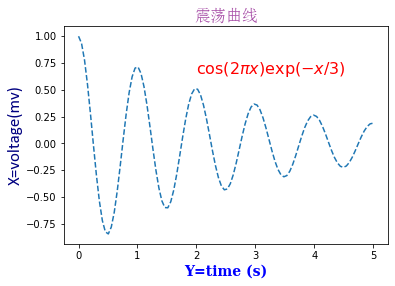

In [1]:
#fontdict学习的案例
#学习的过程中请尝试更换不同的fontdict字典的内容，以便于更好的掌握
#---------设置字体样式，分别是字体，颜色，宽度，大小
font1 = {'family': 'SimSun',#华文楷体
         'alpha':0.7,#透明度
        'color':  'purple',
        'weight': 'normal',
        'size': 16,
        }
font2 = {'family': 'Times New Roman',
        'color':  'red',
        'weight': 'normal',
        'size': 16,
        }
font3 = {'family': 'serif',
        'color':  'blue',
        'weight': 'bold',
        'size': 14,
        }
font4 = {'family': 'Calibri',
        'color':  'navy',
        'weight': 'normal',
        'size': 17,
        }
#-----------四种不同字体显示风格-----
 
#-------建立函数----------
x = np.linspace(0.0, 5.0, 100)
y = np.cos(2*np.pi*x) * np.exp(-x/3)
#-------绘制图像，添加标注----------
plt.plot(x, y, '--')
plt.title('震荡曲线', fontdict=font1)
#------添加文本在指定的坐标处------------
plt.text(2, 0.65, r'$\cos(2 \pi x) \exp(-x/3)$', fontdict=font2)
#---------设置坐标标签
plt.xlabel('Y=time (s)', fontdict=font3)
plt.ylabel('X=voltage(mv)', fontdict=font4)
 
# 调整图像边距
plt.subplots_adjust(left=0.15)
plt.show()

### 2.title和set_title
pyplot API：matplotlib.pyplot.title(label, fontdict=None, loc=None, pad=None, \*, y=None, \*\*kwargs)  
OO API:Axes.set_title(self, label, fontdict=None, loc=None, pad=None, \*, y=None, \*\*kwargs)  
该命令是用来设置axes的标题。  
**参数**：此方法接受以下描述的参数:  
label：str，此参数是要添加的文本  
fontdict：dict，此参数是控制title文本的外观，默认fontdict如下：
```python
{'fontsize': rcParams['axes.titlesize'],
 'fontweight': rcParams['axes.titleweight'],
 'color': rcParams['axes.titlecolor'],
 'verticalalignment': 'baseline',
 'horizontalalignment': loc}
 ```
loc:str，{'center', 'left', 'right'}默认为center  
pad:float,该参数是指标题偏离图表顶部的距离，默认为6。  
y:float，该参数是title所在axes垂向的位置。默认值为1，即title位于axes的顶部。  
kwargs：该参数是指可以设置的一些奇特文本的属性。  
**返回值**：此方法返回作为创建的title实例的文本。

### 3.figtext和text
pyplot API：matplotlib.pyplot.figtext(x, y, s, fontdict=None, \*\*kwargs)  
OO API:text(self, x, y, s, fontdict=None,\*\*kwargs)  
**参数**：此方法接受以下描述的参数:    
x,y：float，此参数是指在figure中放置文本的位置。一般取值是在\[0,1\]范围内。使用transform关键字可以更改坐标系。  
s:str,此参数是指文本  
fontdict:dict,此参数是一个可选参数，并且是一个覆盖默认文本属性的字典。如果fontdict为None，则由rcParams确定默认值。  
**返回值**：此方法返回作为创建的文本实例的文本。

### 4.suptitle
pyplot API：matplotlib.pyplot.suptitle(t, \*\*kwargs)  
OO API:suptitle(self, t, \*\*kwargs)  
**参数**：此方法接受以下描述的参数:      
t: str,标题的文本  
x：float,默认值是0.5.该参数是指文本在figure坐标系下的x坐标  
y：float,默认值是0.95.该参数是指文本在figure坐标系下的y坐标  
horizontalalignment, ha:该参数是指选择文本水平对齐方式，有三种选择{'center', 'left', right'}，默认值是 'center'  
verticalalignment, va：该参数是指选择文本垂直对齐方式，有四种选择{'top', 'center', 'bottom', 'baseline'}，默认值是 'top'  
fontsize, size：该参数是指文本的大小，默认值是依据rcParams的设置：rcParams["figure.titlesize"] (default: 'large')  
fontweight, weight：该参数是用来设置字重。默认值是依据rcParams的设置：rcParams["figure.titleweight"] (default: 'normal')  
[fontproperties](https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties):None or dict,该参数是可选参数，如果该参数被指定，字体的大小将从该参数的默认值中提取。  
**返回值**：此方法返回作为创建的title实例的文本。

### 5.xlabel和ylabel

pyplot API：matplotlib.pyplot.xlabel(xlabel, fontdict=None, labelpad=None, \*, loc=None, \*\*kwargs)  
&emsp;&emsp;&emsp;&emsp;&emsp;matplotlib.pyplot.ylabel(ylabel, fontdict=None, labelpad=None,\*, loc=None, \*\*kwargs)  
OO API: &emsp;Axes.set_xlabel(self, xlabel, fontdict=None, labelpad=None, \*, loc=None, \*\*kwargs)  
&emsp;&emsp;&emsp;&emsp;&emsp;Axes.set_ylabel(self, ylabel, fontdict=None, labelpad=None,\*, loc=None, \*\*kwargs)  
**参数**：此方法接受以下描述的参数:        
xlabel或者ylabel：label的文本  
labelpad:设置label距离轴(axis)的距离  
loc:{'left', 'center', 'right'},默认为center  
\*\*kwargs:[文本](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)属性   
**返回值**：此方法返回作为创建的xlabel和ylabel实例的文本。

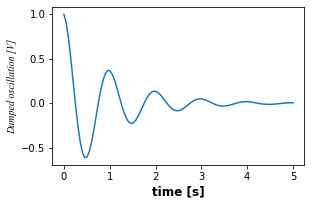

In [3]:
#文本属性的输入一种是通过**kwargs属性这种方式，一种是通过操作 matplotlib.font_manager.FontProperties 方法
#该案例中对于x_label采用**kwargs调整字体属性，y_label则采用 matplotlib.font_manager.FontProperties 方法调整字体属性
#该链接是FontProperties方法的介绍 https://matplotlib.org/api/font_manager_api.html#matplotlib.font_manager.FontProperties
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

font = FontProperties()
font.set_family('serif')
font.set_name('Times New Roman')
font.set_style('italic')

fig, ax = plt.subplots(figsize=(5, 3))
fig.subplots_adjust(bottom=0.15, left=0.2)
ax.plot(x1, y1)
ax.set_xlabel('time [s]', fontsize='large', fontweight='bold')
ax.set_ylabel('Damped oscillation [V]', fontproperties=font)

plt.show()

### 6.annotate
pyplot API：matplotlib.pyplot.annotate(text, xy, \*args,\*\*kwargs)  
OO API:Axes.annotate(self, text, xy, \*args,\*\*kwargs)  

**参数**：此方法接受以下描述的参数:          
text:str，该参数是指注释文本的内容  
xy：该参数接受二维元组(float, float)，是指要注释的点。其二维元组所在的坐标系由xycoords参数决定  
xytext：注释文本的坐标点，也是二维元组，默认与xy相同  
xycoords:该参数接受   被注释点的坐标系属性，允许的输入值如下:

| 属性值            | 含义                                                         |
| :---------------- | :----------------------------------------------------------- |
| 'figure points'   | 以绘图区左下角为参考，单位是点数                             |
| 'figure pixels'   | 以绘图区左下角为参考，单位是像素数                           |
| 'figure fraction' | 以绘图区左下角为参考，单位是百分比                           |
| 'axes points'     | 以子绘图区左下角为参考，单位是点数（一个figure可以有多个axes，默认为1个） |
| 'axes pixels'     | 以子绘图区左下角为参考，单位是像素数                         |
| 'axes fraction'   | 以子绘图区左下角为参考，单位是百分比                         |
| 'data'            | 以被注释的坐标点xy为参考 (默认值)                            |
| 'polar'           | *不使用本地数据坐标系，使用极坐标系*                         |

textcoords ：注释文本的坐标系属性，默认与xycoords属性值相同，也可设为不同的值。除了允许输入xycoords的属性值，还允许输入以下两种：

| 属性值          | 含义                                   |
| :-------------- | :------------------------------------- |
| 'offset points' | 相对于被注释点xy的偏移量（单位是点）   |
| 'offset pixels' | 相对于被注释点xy的偏移量（单位是像素） |

arrowprops：箭头的样式，dict（字典）型数据，如果该属性非空，则会在注释文本和被注释点之间画一个箭头。如果不设置`'arrowstyle'` 关键字，则允许包含以下关键字：

| 关键字     | 说明                                                |
| :--------- | :-------------------------------------------------- |
| width      | 箭头的宽度（单位是点）                              |
| headwidth  | 箭头头部的宽度（点）                                |
| headlength | 箭头头部的长度（点）                                |
| shrink     | 箭头两端收缩的百分比（占总长）                      |
| ?          | 任何 [matplotlib.patches.FancyArrowPatch](https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)中的关键字 |

如果设置了‘arrowstyle’关键字，以上关键字就不能使用。允许的值有：

| 箭头的样式 | 属性                                          |
| :--------- | :-------------------------------------------- |
| `'-'`      | None                                          |
| `'->'`     | head_length=0.4,head_width=0.2                |
| `'-['`     | widthB=1.0,lengthB=0.2,angleB=None            |
| `'|-|'`    | widthA=1.0,widthB=1.0                         |
| `'-|>'`    | head_length=0.4,head_width=0.2                |
| `'<-'`     | head_length=0.4,head_width=0.2                |
| `'<->'`    | head_length=0.4,head_width=0.2                |
| `'<|-'`    | head_length=0.4,head_width=0.2                |
| `'<|-|>'`  | head_length=0.4,head_width=0.2                |
| `'fancy'`  | head_length=0.4,head_width=0.4,tail_width=0.4 |
| `'simple'` | head_length=0.5,head_width=0.5,tail_width=0.2 |
| `'wedge'`  | tail_width=0.3,shrink_factor=0.5              |
  
 下图展现了不同的arrowstyle的不同形式
<img src="https://matplotlib.org/_images/sphx_glr_fancyarrow_demo_001.png" alt="image-20201108230524176" style="zoom:50%;" />

[FancyArrowPatch]( https://matplotlib.org/api/_as_gen/matplotlib.patches.FancyArrowPatch.html#matplotlib.patches.FancyArrowPatch)的关键字包括:

| Key             | Description                                                  |
| :-------------- | :----------------------------------------------------------- |
| arrowstyle      | 箭头的样式                                                   |
| connectionstyle | 连接线的样式                                                 |
| relpos          | 箭头起始点相对注释文本的位置，默认为 (0.5, 0.5)，即文本的中心，（0，0）表示左下角，（1，1）表示右上角 |
| patchA          | 箭头起点处的图形（matplotlib.patches对象），默认是注释文字框 |
| patchB          | 箭头终点处的图形（matplotlib.patches对象），默认为空         |
| shrinkA         | 箭头起点的缩进点数，默认为2                                  |
| shrinkB         | 箭头终点的缩进点数，默认为2                                  |
| mutation_scale  | default is text size (in points)                             |
| mutation_aspect | default is 1.                                                |
| ?               | any key for [`matplotlib.patches.PathPatch`](https://matplotlib.org/api/_as_gen/matplotlib.patches.PathPatch.html#matplotlib.patches.PathPatch) |

annotation_clip : 布尔值，可选参数，默认为空。设为True时，只有被注释点在axes时才绘制注释；设为False时，无论被注释点在哪里都绘制注释。仅当xycoords为‘data’时，默认值空相当于True。  
\*\*kwargs:该参数接受任何[Text](https://matplotlib.org/api/text_api.html#matplotlib.text.Text)的参数

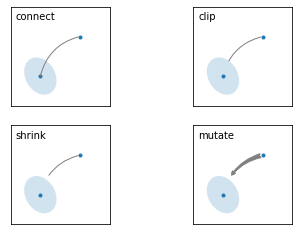

In [4]:
#此代码主要给示范了不同的arrowstyle以及FancyArrowPatch的样式
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
fig, axs = plt.subplots(2, 2)
x1, y1 = 0.3, 0.3
x2, y2 = 0.7, 0.7

ax = axs.flat[0]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)#在axes中创建一个artist
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-",#箭头的样式
                            color="0.5",
                            patchB=None,
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
#在整个代码中使用Transform=ax.transAx表示坐标相对于axes的bounding box，其中(0，0)是轴的左下角，(1，1)是右上角。
ax.text(.05, .95, "connect", transform=ax.transAxes, ha="left", va="top")

ax = axs.flat[1]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            color="0.5",
                            patchB=el,#箭头终点处的图形
                            shrinkB=0,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
ax.text(.05, .95, "clip", transform=ax.transAxes, ha="left", va="top")

ax = axs.flat[2]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="-",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
ax.text(.05, .95, "shrink", transform=ax.transAxes, ha="left", va="top")

ax = axs.flat[3]
ax.plot([x1, x2], [y1, y2], ".")
el = mpatches.Ellipse((x1, y1), 0.3, 0.4, angle=30, alpha=0.2)
ax.add_artist(el)
ax.annotate("",
            xy=(x1, y1), xycoords='data',
            xytext=(x2, y2), textcoords='data',
            arrowprops=dict(arrowstyle="fancy",
                            color="0.5",
                            patchB=el,
                            shrinkB=5,#箭头终点的缩进点数
                            connectionstyle="arc3,rad=0.3",
                            ),
            )
ax.text(.05, .95, "mutate", transform=ax.transAxes, ha="left", va="top")

for ax in axs.flat:
    ax.set(xlim=(0, 1), ylim=(0, 1), xticks=[], yticks=[], aspect=1)

plt.show()

两个点之间的连接路径主要有connectionstyle和以下样式确定


| Name     | Attrs                                         |
| -------- | --------------------------------------------- |
| `angle`  | angleA=90,angleB=0,rad=0.0                    |
| `angle3` | angleA=90,angleB=0                            |
| `arc`    | angleA=0,angleB=0,armA=None,armB=None,rad=0.0 |
| `arc3`   | rad=0.0                                       |
| `bar`    | armA=0.0,armB=0.0,fraction=0.3,angle=None     |  

其中angle3 和 arc3 中的 3 意味着所得到的路径是二次样条段（ 三个控制点）   
下面的例子丰富的展现了连接线的用法，可以参考学习

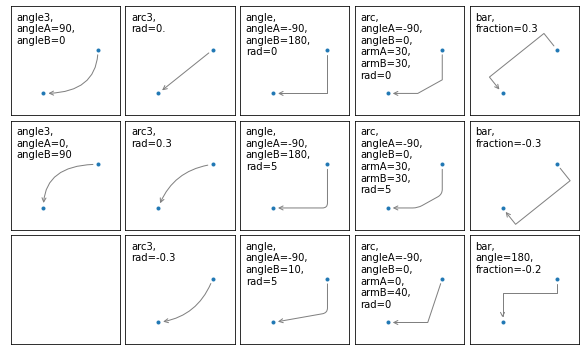

In [5]:
import matplotlib.pyplot as plt
def demo_con_style(ax, connectionstyle):
    x1, y1 = 0.3, 0.2
    x2, y2 = 0.8, 0.6

    ax.plot([x1, x2], [y1, y2], ".")
    ax.annotate("",
                xy=(x1, y1), xycoords='data',
                xytext=(x2, y2), textcoords='data',
                arrowprops=dict(arrowstyle="->", color="0.5",
                                shrinkA=5, shrinkB=5,
                                patchA=None, patchB=None,
                                connectionstyle=connectionstyle,
                                ),
                )

    ax.text(.05, .95, connectionstyle.replace(",", ",\n"),
            transform=ax.transAxes, ha="left", va="top")


fig, axs = plt.subplots(3, 5, figsize=(8, 4.8))
demo_con_style(axs[0, 0], "angle3,angleA=90,angleB=0")
demo_con_style(axs[1, 0], "angle3,angleA=0,angleB=90")
demo_con_style(axs[0, 1], "arc3,rad=0.")
demo_con_style(axs[1, 1], "arc3,rad=0.3")
demo_con_style(axs[2, 1], "arc3,rad=-0.3")
demo_con_style(axs[0, 2], "angle,angleA=-90,angleB=180,rad=0")
demo_con_style(axs[1, 2], "angle,angleA=-90,angleB=180,rad=5")
demo_con_style(axs[2, 2], "angle,angleA=-90,angleB=10,rad=5")
demo_con_style(axs[0, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=0")
demo_con_style(axs[1, 3], "arc,angleA=-90,angleB=0,armA=30,armB=30,rad=5")
demo_con_style(axs[2, 3], "arc,angleA=-90,angleB=0,armA=0,armB=40,rad=0")
demo_con_style(axs[0, 4], "bar,fraction=0.3")
demo_con_style(axs[1, 4], "bar,fraction=-0.3")
demo_con_style(axs[2, 4], "bar,angle=180,fraction=-0.2")

for ax in axs.flat:
    ax.set(xlim=(0, 1), ylim=(0, 1), xticks=[], yticks=[], aspect=1)
fig.tight_layout(pad=0.2)

plt.show()

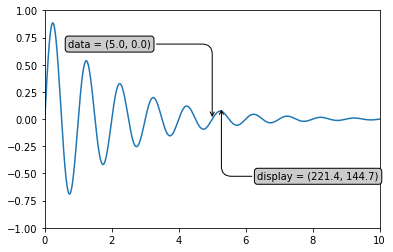

In [6]:
#以下两个block懂了之后，annotate基本懂了
#如果想更深入学习可以参看官网案例学习https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.annotate.html#matplotlib.axes.Axes.annotate
import numpy as np
import matplotlib.pyplot as plt
 
# 以步长0.005绘制一个曲线
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)
 
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)#设置x轴的范围
ax.set_ylim(-1, 1)#设置x轴的范围
 
# 被注释点的数据轴坐标和所在的像素
xdata, ydata = 5, 0
xdisplay, ydisplay = ax.transData.transform_point((xdata, ydata))
 
# 设置注释文本的样式和箭头的样式
bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle = "->",
    connectionstyle = "angle,angleA=0,angleB=90,rad=10")
 
# 设置偏移量
offset = 72
# xycoords默认为'data'数据轴坐标，对坐标点（5,0）添加注释
# 注释文本参考被注释点设置偏移量，向左2*72points，向上72points
ax.annotate('data = (%.1f, %.1f)'%(xdata, ydata),
            (xdata, ydata), xytext=(-2*offset, offset), textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
 
# xycoords以绘图区左下角为参考，单位为像素
# 注释文本参考被注释点设置偏移量，向右0.5*72points，向下72points
disp = ax.annotate('display = (%.1f, %.1f)'%(xdisplay, ydisplay),
            (xdisplay, ydisplay), xytext=(0.5*offset, -offset),
            xycoords='figure pixels',
            textcoords='offset points',
            bbox=bbox, arrowprops=arrowprops)
plt.show()

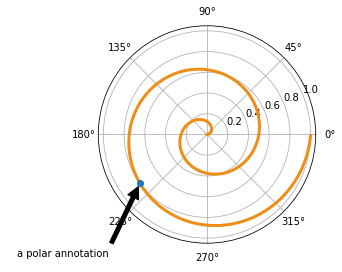

In [7]:
import numpy as np
import matplotlib.pyplot as plt
 
# 绘制一个极地坐标，再以0.001为步长，画一条螺旋曲线
fig = plt.figure()
ax = fig.add_subplot(111, polar=True)
r = np.arange(0,1,0.001)
theta = 2 * 2*np.pi * r
line, = ax.plot(theta, r, color='#ee8d18', lw=3)
 
# 对索引为800处画一个圆点，并做注释
ind = 800
thisr, thistheta = r[ind], theta[ind]
ax.plot([thistheta], [thisr], 'o')
ax.annotate('a polar annotation',
            xy=(thistheta, thisr),  # 被注释点遵循极坐标系，坐标为角度和半径
            xytext=(0.05, 0.05),    # 注释文本放在绘图区的0.05百分比处
            textcoords='figure fraction',
            arrowprops=dict(facecolor='black', shrink=0.05),# 箭头线为黑色，两端缩进5%
            horizontalalignment='left',# 注释文本的左端和低端对齐到指定位置
            verticalalignment='bottom',
            )
plt.show()

 ### 7.字体的属性设置
 字体设置一般有全局字体设置和自定义局部字体设置两种方法。

In [8]:
#首先可以查看matplotlib所有可用的字体
from matplotlib import font_manager
font_family = font_manager.fontManager.ttflist
font_name_list = [i.name for i in font_family]
for font in font_name_list:
    print(f'{font}\n')

cmmi10

DejaVu Sans Mono

DejaVu Sans

STIXSizeFourSym

DejaVu Sans Display

DejaVu Serif

STIXGeneral

STIXNonUnicode

STIXSizeFourSym

STIXSizeThreeSym

STIXGeneral

cmr10

STIXNonUnicode

cmsy10

DejaVu Sans

STIXSizeFiveSym

DejaVu Sans

STIXSizeThreeSym

DejaVu Serif Display

DejaVu Sans

cmex10

DejaVu Sans Mono

STIXNonUnicode

STIXSizeOneSym

STIXSizeTwoSym

DejaVu Serif

STIXNonUnicode

cmb10

STIXGeneral

STIXGeneral

DejaVu Serif

STIXSizeOneSym

cmss10

STIXSizeTwoSym

cmtt10

DejaVu Sans Mono

DejaVu Serif

DejaVu Sans Mono

Elephant

Trebuchet MS

Dubai

Microsoft New Tai Lue

Ravie

Verdana

Elephant

Microsoft Tai Le

Book Antiqua

Gill Sans MT Ext Condensed Bold

Nirmala UI

Segoe UI

FZShuTi

Lucida Fax

Eras Demi ITC

STHupo

Constantia

Ebrima

Symbol

DengXian

MS Reference Sans Serif

Yu Gothic

Tahoma

Arial

Agency FB

Corbel

Javanese Text

Castellar

Lucida Sans

FZYaoTi

Lucida Sans

Tahoma

Lucida Sans Typewriter

Gill Sans Ultra Bold Condensed

STZhongsong


  [为方便在图中加入合适的字体，可以尝试了解中文字体的英文名称,该链接告诉了常用中文的英文名称](https://www.cnblogs.com/chendc/p/9298832.html)

In [9]:
#该block讲述如何在matplotlib里面，修改字体默认属性，完成全局字体的更改。
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimSun']    # 指定默认字体为新宋体。
plt.rcParams['axes.unicode_minus'] = False      # 解决保存图像时 负号'-' 显示为方块和报错的问题。

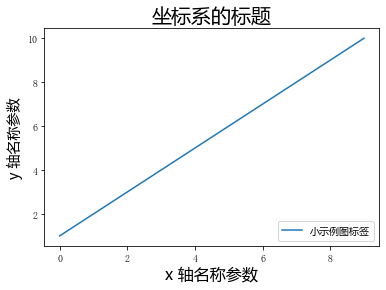

In [10]:
#局部字体的修改方法1
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')

# 直接用字体的名字。
plt.xlabel('x 轴名称参数', fontproperties='Microsoft YaHei', fontsize=16)         # 设置x轴名称，采用微软雅黑字体
plt.ylabel('y 轴名称参数', fontproperties='Microsoft YaHei', fontsize=14)         # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties='Microsoft YaHei', fontsize=20)         # 设置坐标系标题的字体
plt.legend(loc='lower right', prop={"family": 'Microsoft YaHei'}, fontsize=10)    # 小示例图的字体设置

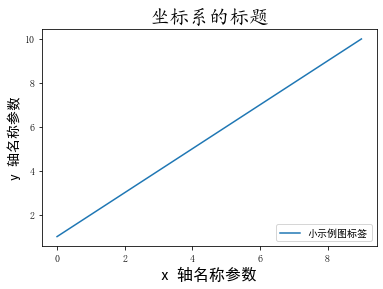

In [11]:
#局部字体的修改方法2
import matplotlib.pyplot as plt
import matplotlib.font_manager as fontmg

x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
plt.plot(x, label='小示例图标签')
#fname为你系统中的字体库路径
my_font1 = fontmg.FontProperties(fname=r'C:\Windows\Fonts\simhei.ttf')      # 读取系统中的 黑体 字体。
my_font2 = fontmg.FontProperties(fname=r'C:\Windows\Fonts\simkai.ttf')      # 读取系统中的 楷体 字体。
# fontproperties 设置中文显示，fontsize 设置字体大小
plt.xlabel('x 轴名称参数', fontproperties=my_font1, fontsize=16)       # 设置x轴名称
plt.ylabel('y 轴名称参数', fontproperties=my_font1, fontsize=14)       # 设置Y轴名称
plt.title('坐标系的标题',  fontproperties=my_font2, fontsize=20)       # 标题的字体设置
plt.legend(loc='lower right', prop=my_font1, fontsize=10)              # 小示例图的字体设置


### 8.数学表达式
在文本标签中使用数学表达式。有关MathText的概述，请参见 [写数学表达式](https://matplotlib.org/tutorials/text/mathtext.html#sphx-glr-tutorials-text-mathtext-py),但由于数学表达式的练习想必我们都在markdown语法和latex语法中多少有接触，故在此不继续展开，愿意深入学习的可以参看官方文档.下面是一个官方案例，供参考了解。

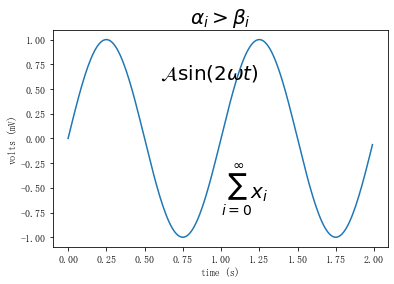

In [13]:
import numpy as np
import matplotlib.pyplot as plt
t = np.arange(0.0, 2.0, 0.01)
s = np.sin(2*np.pi*t)

plt.plot(t, s)
plt.title(r'$\alpha_i > \beta_i$', fontsize=20)
plt.text(1, -0.6, r'$\sum_{i=0}^\infty x_i$', fontsize=20)
plt.text(0.6, 0.6, r'$\mathcal{A}\mathrm{sin}(2 \omega t)$',
         fontsize=20)
plt.xlabel('time (s)')
plt.ylabel('volts (mV)')
plt.show()

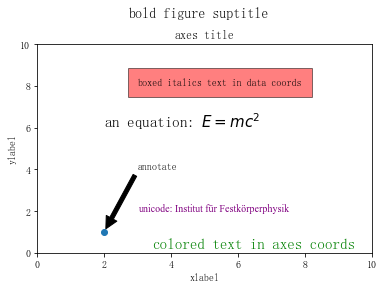

In [12]:
#这是对前七节学习内容的总结案例
import matplotlib
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111)
fig.subplots_adjust(top=0.85)

# 分别在figure和subplot上设置title
fig.suptitle('bold figure suptitle', fontsize=14, fontweight='bold')
ax.set_title('axes title')

ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# 设置x-axis和y-axis的范围都是[0, 10]
ax.axis([0, 10, 0, 10])

ax.text(3, 8, 'boxed italics text in data coords', style='italic',
        bbox={'facecolor': 'red', 'alpha': 0.5, 'pad': 10})

ax.text(2, 6, r'an equation: $E=mc^2$', fontsize=15)
font1 = {'family': 'Times New Roman',
        'color':  'purple',
        'weight': 'normal',
        'size': 10,
        }
ax.text(3, 2, 'unicode: Institut für Festkörperphysik',fontdict=font1)
ax.text(0.95, 0.01, 'colored text in axes coords',
        verticalalignment='bottom', horizontalalignment='right',
        transform=ax.transAxes,
        color='green', fontsize=15)

ax.plot([2], [1], 'o')
ax.annotate('annotate', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()

## 二、Tick上的文本

设置tick（刻度）和ticklabel（刻度标签）也是可视化中经常需要操作的步骤，matplotlib既提供了自动生成刻度和刻度标签的模式（默认状态），同时也提供了许多让使用者灵活设置的方式。

### 1.简单模式
可以使用axis的`set_ticks`方法手动设置标签位置，使用axis的`set_ticklabels`方法手动设置标签格式

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib
x1 = np.linspace(0.0, 5.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)

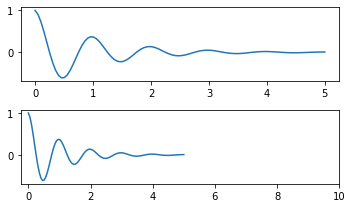

In [6]:
# 使用axis的set_ticks方法手动设置标签位置的例子，该案例中由于tick设置过大，所以会影响绘图美观，不建议用此方式进行设置tick
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
axs[1].xaxis.set_ticks(np.arange(0., 10.1, 2.))
plt.show()

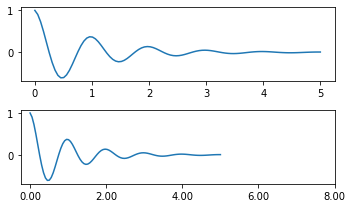

In [7]:
# 使用axis的set_ticklabels方法手动设置标签格式的例子
fig, axs = plt.subplots(2, 1, figsize=(5, 3), tight_layout=True)
axs[0].plot(x1, y1)
axs[1].plot(x1, y1)
ticks = np.arange(0., 8.1, 2.)
tickla = [f'{tick:1.2f}' for tick in ticks]
axs[1].xaxis.set_ticks(ticks)
axs[1].xaxis.set_ticklabels(tickla)
plt.show()

<a list of 14 Line2D ticklines objects>


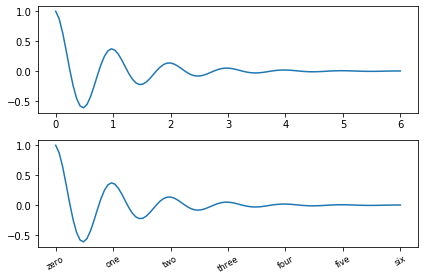

In [8]:
#一般绘图时会自动创建刻度，而如果通过上面的例子使用set_ticks创建刻度可能会导致tick的范围与所绘制图形的范围不一致的问题。
#所以在下面的案例中，axs[1]中set_xtick的设置要与数据范围所对应，然后再通过set_xticklabels设置刻度所对应的标签
import numpy as np
import matplotlib.pyplot as plt
fig, axs = plt.subplots(2, 1, figsize=(6, 4), tight_layout=True)
x1 = np.linspace(0.0, 6.0, 100)
y1 = np.cos(2 * np.pi * x1) * np.exp(-x1)
axs[0].plot(x1, y1)
axs[0].set_xticks([0,1,2,3,4,5,6])

axs[1].plot(x1, y1)
axs[1].set_xticks([0,1,2,3,4,5,6])#要将x轴的刻度放在数据范围中的哪些位置
axs[1].set_xticklabels(['zero','one', 'two', 'three', 'four', 'five','six'],#设置刻度对应的标签
                   rotation=30, fontsize='small')#rotation选项设定x刻度标签倾斜30度。
axs[1].xaxis.set_ticks_position('bottom')#set_ticks_position()方法是用来设置刻度所在的位置，常用的参数有bottom、top、both、none
print(axs[1].xaxis.get_ticklines())
plt.show()

### 2.Tick Locators and Formatters

除了上述的简单模式，还可以使用`Tick Locators and Formatters`完成对于刻度位置和刻度标签的设置。
其中[Axis.set_major_locator](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_major_locator.html#matplotlib.axis.Axis.set_major_locator)和[Axis.set_minor_locator](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_minor_locator.html#matplotlib.axis.Axis.set_minor_locator)方法用来设置标签的位置，[Axis.set_major_formatter](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_major_formatter.html#matplotlib.axis.Axis.set_major_formatter)和[Axis.set_minor_formatter](https://matplotlib.org/api/_as_gen/matplotlib.axis.Axis.set_minor_formatter.html#matplotlib.axis.Axis.set_minor_formatter)方法用来设置标签的格式。这种方式的好处是不用显式地列举出刻度值列表。

set_major_formatter和set_minor_formatter这两个formatter格式命令可以接收字符串格式（matplotlib.ticker.StrMethodFormatter）或函数参数（matplotlib.ticker.FuncFormatter）来设置刻度值的格式 。

### Tick Formatters

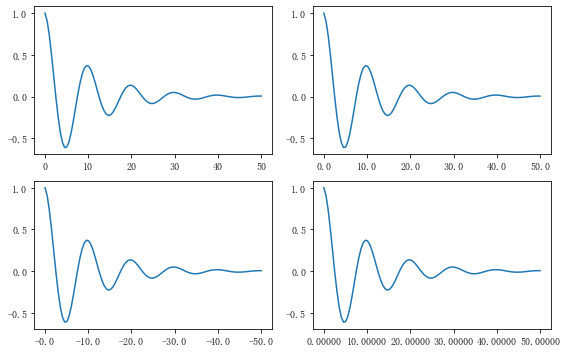

In [17]:
# 接收字符串格式的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

formatter = matplotlib.ticker.FormatStrFormatter('%1.1f')
axs[0, 1].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('-%1.1f')
axs[1, 0].xaxis.set_major_formatter(formatter)

formatter = matplotlib.ticker.FormatStrFormatter('%1.5f')
axs[1, 1].xaxis.set_major_formatter(formatter)

plt.show()

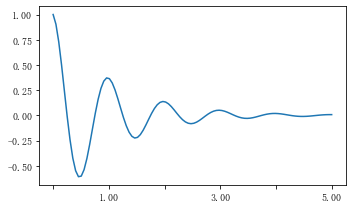

In [18]:
# 接收函数的例子
def formatoddticks(x, pos):
    """Format odd tick positions."""
    if x % 2:
        return f'{x:1.2f}'
    else:
        return ''

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.plot(x1, y1)
ax.xaxis.set_major_formatter(formatoddticks)
plt.show()

### Tick Locators 


在普通的绘图中，我们可以直接通过上图的set_ticks进行设置刻度的位置，缺点是需要自己指定或者接受matplotlib默认给定的刻度。当需要更改刻度的位置时，matplotlib给了常用的几种locator的类型。如果要绘制更复杂的图，可以先设置locator的类型，然后通过axs.xaxis.set_major_locator(locator)绘制即可  
locator=plt.MaxNLocator(nbins=7)  
locator=plt.FixedLocator(locs=[0,0.5,1.5,2.5,3.5,4.5,5.5,6])#直接指定刻度所在的位置  
locator=plt.AutoLocator()#自动分配刻度值的位置  
locator=plt.IndexLocator(offset=0.5, base=1)#面元间距是1，从0.5开始  
locator=plt.MultipleLocator(1.5)#将刻度的标签设置为1.5的倍数  
locator=plt.LinearLocator(numticks=5)#线性划分5等分，4个刻度  

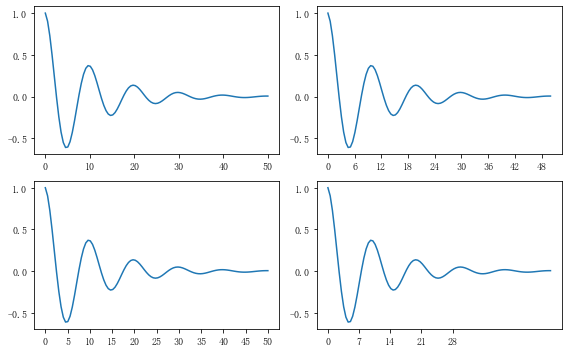

In [19]:
# 接收各种locator的例子
fig, axs = plt.subplots(2, 2, figsize=(8, 5), tight_layout=True)
for n, ax in enumerate(axs.flat):
    ax.plot(x1*10., y1)

locator = matplotlib.ticker.AutoLocator()
axs[0, 0].xaxis.set_major_locator(locator)

locator = matplotlib.ticker.MaxNLocator(nbins=10)
axs[0, 1].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.MultipleLocator(5)
axs[1, 0].xaxis.set_major_locator(locator)


locator = matplotlib.ticker.FixedLocator([0,7,14,21,28])
axs[1, 1].xaxis.set_major_locator(locator)

plt.show()

 此外`matplotlib.dates` 模块还提供了特殊的设置日期型刻度格式和位置的方式

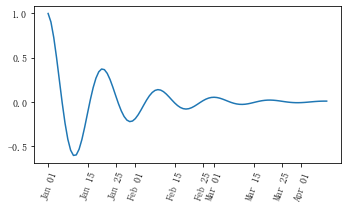

In [20]:
import matplotlib.dates as mdates
import datetime
# 特殊的日期型locator和formatter
locator = mdates.DayLocator(bymonthday=[1,15,25])
formatter = mdates.DateFormatter('%b %d')

fig, ax = plt.subplots(figsize=(5, 3), tight_layout=True)
ax.xaxis.set_major_locator(locator)
ax.xaxis.set_major_formatter(formatter)
base = datetime.datetime(2017, 1, 1, 0, 0, 1)
time = [base + datetime.timedelta(days=x) for x in range(len(x1))]
ax.plot(time, y1)
ax.tick_params(axis='x', rotation=70)
plt.show()

**其他案例**

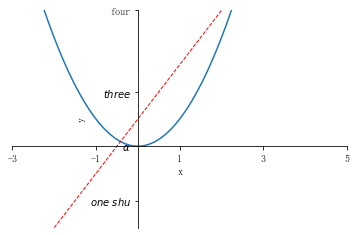

In [22]:
#这个案例中展示了如何进行坐标轴的移动，如何更改刻度值的样式
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(-3,3,50)
y1 = 2*x+1
y2 = x**2
plt.figure()
plt.plot(x,y2)
plt.plot(x,y1,color='red',linewidth=1.0,linestyle = '--')
plt.xlim((-3,5))
plt.ylim((-3,5))
plt.xlabel('x')
plt.ylabel('y')
new_ticks1 = np.linspace(-3,5,5)
plt.xticks(new_ticks1)
plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
上一行代码是将y轴上的小标改成文字,其中，空格需要增加\，即'\ ',$可将格式更改成数字模式，如果需要输入数学形式的α，则需要用\转换，即\alpha
如果使用面向对象的命令进行画图，那么下面两行代码可以实现与 plt.yticks([-2,0,2,5],[r'$one\ shu$',r'$\alpha$',r'$three$',r'four']) 同样的功能
axs.set_yticks([-2,0,2,5])
axs.set_yticklabels([r'$one\ shu$',r'$\alpha$',r'$three$',r'four'])
'''
ax = plt.gca()#gca = 'get current axes' 获取现在的轴
'''
ax = plt.gca()是获取当前的axes，其中gca代表的是get current axes。
fig=plt.gcf是获取当前的figure，其中gcf代表的是get current figure。

许多函数都是对当前的Figure或Axes对象进行处理，
例如plt.plot()实际上会通过plt.gca()获得当前的Axes对象ax，然后再调用ax.plot()方法实现真正的绘图。

而在本例中则可以通过ax.spines方法获得当前顶部和右边的轴并将其颜色设置为不可见
然后将左边轴和底部的轴所在的位置重新设置
最后再通过set_ticks_position方法设置ticks在x轴或y轴的位置，本示例中因所设置的bottom和left是ticks在x轴或y轴的默认值，所以这两行的代码也可以不写
'''
ax.spines['top'].set_color('none')
ax.spines['right'].set_color('none')
ax.spines['left'].set_position(('data',0))
ax.spines['bottom'].set_position(('data',0))#axes 百分比
ax.xaxis.set_ticks_position('bottom')   #设置ticks在x轴的位置
ax.yaxis.set_ticks_position('left')     #设置ticks在y轴的位置
plt.show()

## 三、[legend](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html#matplotlib.pyplot.legend)（图例）

图例的设置会使用一些常见术语，为了清楚起见，这些术语在此处进行说明：
##### legend entry（图例条目）
图例有一个或多个legend entries组成。一个entry由一个key和一个label组成。
##### legend key（图例键）
每个 legend label左面的colored/patterned marker（彩色/图案标记）
##### legend label（图例标签）
描述由key来表示的handle的文本
##### legend handle（图例句柄）
用于在图例中生成适当图例条目的原始对象

以下面这个图为例，右侧的方框中的共有两个legend entry；两个legend key，分别是一个蓝色和一个黄色的legend key；两个legend label，一个名为‘Line up’和一个名为‘Line Down’的legend label

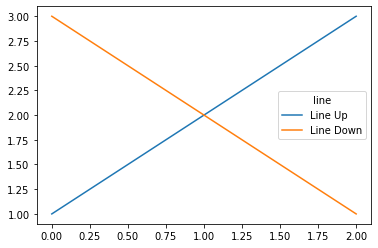

matplotlib.pyplot.legend(\*args, \*\*kwargs)

**参数**：此方法接受以下描述的参数:   

| keyword         | Description                                                  |
| --------------- | ------------------------------------------------------------ |
| loc             | Location code string, or tuple (see below).图例所有figure位置 |
| prop            | the font property字体参数                                    |
| fontsize        | the font size (used only if prop is not specified)           |
| markerscale     | the relative size of legend markers vs. original图例标记与原始标记的相对大小 |
| markerfirst     | If True (default), marker is to left of the label.如果为True，则图例标记位于图例标签的左侧 |
| numpoints       | the number of points in the legend for line为线条图图例条目创建的标记点数 |
| scatterpoints   | the number of points in the legend for scatter plot为散点图图例条目创建的标记点数 |
| scatteryoffsets | a list of yoffsets for scatter symbols in legend为散点图图例条目创建的标记的垂直偏移量 |
| frameon         | If True, draw the legend on a patch (frame).控制是否应在图例周围绘制框架 |
| fancybox        | If True, draw the frame with a round fancybox.控制是否应在构成图例背景的FancyBboxPatch周围启用圆边 |
| shadow          | If True, draw a shadow behind legend.控制是否在图例后面画一个阴 |
| framealpha      | Transparency of the frame.控制图例框架的 Alpha 透明度        |
| edgecolor       | Frame edgecolor.                                             |
| facecolor       | Frame facecolor.                                             |
| ncol            | number of columns 设置图例分为n列展示                        |
| borderpad       | the fractional whitespace inside the legend border图例边框的内边距 |
| labelspacing    | the vertical space between the legend entries图例条目之间的垂直间距 |
| handlelength    | the length of the legend handles 图例句柄的长度              |
| handleheight    | the height of the legend handles 图例句柄的高度              |
| handletextpad   | the pad between the legend handle and text 图例句柄和文本之间的间距 |
| borderaxespad   | the pad between the axes and legend border轴与图例边框之间的距离 |
| columnspacing   | the spacing between columns 列间距                           |
| title           | the legend title                                             |
| bbox_to_anchor  | the bbox that the legend will be anchored.指定图例在轴的位置 |
| bbox_transform  | the transform for the bbox. transAxes if None.               |

常用的几个参数：

(1)设置图列位置

plt.legend(loc='upper center') 等同于plt.legend(loc=9)



| |  |  |
| ------------------------------------------------------- | ------------------------------------------ | ------------------------------------------------------------ |
|  0: ‘best'  
1: ‘upper right'  
2: ‘upper left'  
3: ‘lower left'                                                        |   
4: ‘lower right'  
5: ‘right'  
6: ‘center left'                                           |    
7: ‘center right'  
8: ‘lower center'  
9: ‘upper center'  
10: ‘center'                                                           |  


(2)设置图例字体大小

fontsize : int or float or {‘xx-small’, ‘x-small’, ‘small’, ‘medium’, ‘large’, ‘x-large’, ‘xx-large’}

(3)设置图例边框及背景

plt.legend(loc='best',frameon=False) #去掉图例边框  
plt.legend(loc='best',edgecolor='blue') #设置图例边框颜色  
plt.legend(loc='best',facecolor='blue') #设置图例背景颜色,若无边框,参数无效

(4)设置图例标题

legend = plt.legend(["CH", "US"], title='China VS Us')

(5)设置图例名字及对应关系

legend = plt.legend([p1, p2], ["CH", "US"])

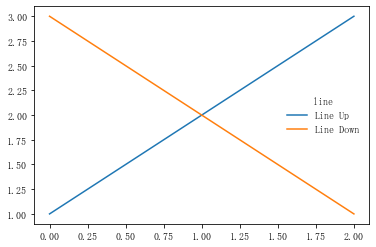

In [23]:
line_up, = plt.plot([1, 2, 3], label='Line 2')
line_down, = plt.plot([3, 2, 1], label='Line 1')
plt.legend([line_up, line_down], ['Line Up', 'Line Down'],loc=5, title='line',frameon=False)#loc参数设置图例所在的位置，title设置图例的标题，frameon参数将图例边框给去掉

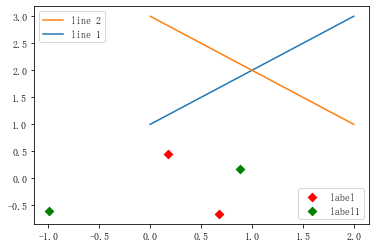

In [24]:
#这个案例是显示多图例legend
import matplotlib.pyplot as plt
import numpy as np
x = np.random.uniform(-1, 1, 4)
y = np.random.uniform(-1, 1, 4)
p1, = plt.plot([1,2,3])
p2, = plt.plot([3,2,1])
l1 = plt.legend([p2, p1], ["line 2", "line 1"], loc='upper left')
 
p3 = plt.scatter(x[0:2], y[0:2], marker = 'D', color='r')
p4 = plt.scatter(x[2:], y[2:], marker = 'D', color='g')
# 下面这行代码由于添加了新的legend，所以会将l1从legend中给移除
plt.legend([p3, p4], ['label', 'label1'], loc='lower right', scatterpoints=1)
# 为了保留之前的l1这个legend，所以必须要通过plt.gca()获得当前的axes，然后将l1作为单独的artist
plt.gca().add_artist(l1)

## 作业
1.尝试在一张图中运用所讲过的功能，对title、text、xlable、ylabel、数学表达式、tick and ticklabel、legend进行详细的设计.  
2.阅读你可能用到文献或者相关书籍，思考自己如何才能通过学过的例子将自己认为比较好看的图给复现出来.

## 参考资料
[1.Python学习笔记（4）——Matplotlib中的annotate（注解）的用法](https://blog.csdn.net/leaf_zizi/article/details/82886755)